# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html).

The dataset being used is *Tips* from Seaborn.

### Step 1. Import the necessary libraries:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [3]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url,sep=',')
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the `Unnamed: 0` column

In [4]:
# delete column 'Unnamed: 0'
del tips['Unnamed: 0']


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Create a histogram with the `total_bill` column.

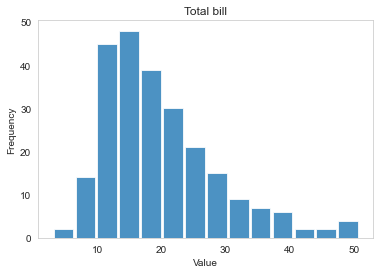

In [6]:
#set style to whitegrid
sns.set_style('whitegrid',{'axes.grid':False})  #remove the grid

plt.hist(tips.total_bill, bins = 14,rwidth = 0.9,alpha=0.8)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Total bill")

plt.show()

### Step 6. Create a scatter plot representing the relationship between `total_bill` and `tip`, while also showing the distribution of each variable as a histogram.
Hint: It's just a single function call.

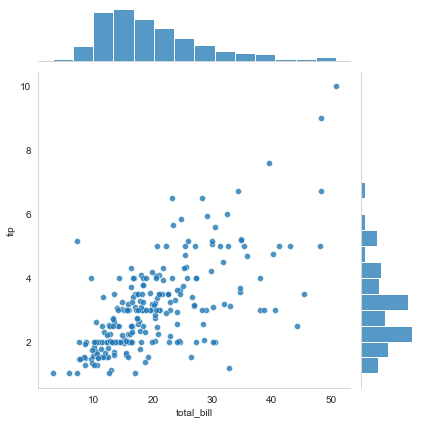

In [7]:

sns.jointplot(data=tips, x="total_bill", y="tip",alpha = 0.8)

### Step 7.  Display the relationship between all the numerical variables using a single plot.
Hint: It's just a single function call.

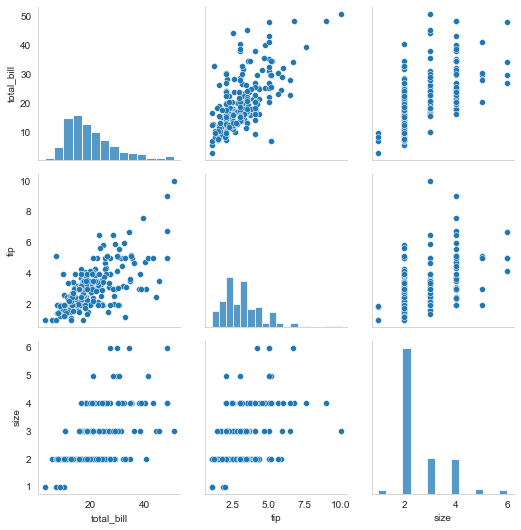

In [8]:
g = sns.PairGrid(tips)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Step 8. Create a scatter plot with the categorical variable `day` and it's relation to `total_bill`.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

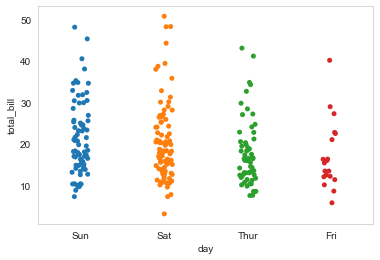

In [9]:
sns.stripplot(x="day", y="total_bill",  data=tips)

### Step 9. Create a scatter plot with the categorical variable `day` and it's relation to `tip`. Put the `day` on the y-axis. Differentiate the dots by sex.

<AxesSubplot:xlabel='tip', ylabel='day'>

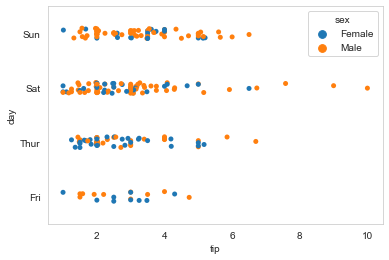

In [10]:
sns.stripplot(x='tip', 
              y='day', 
              data=tips, 
              hue="sex") 


### Step 10.  Create a box plot representing the `total_bill` per `day`, while also differentiating by `time` (Dinner or Lunch).

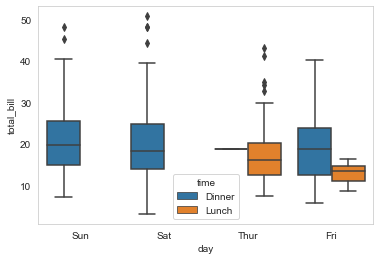

In [11]:
ax= sns.boxplot(x="day", y="total_bill", data=tips,hue="time")
sns.move_legend(ax, "lower center")

### Step 11. Create two histograms of `tip`, based on whether it is dinner time or lunch time. They must be side by side.

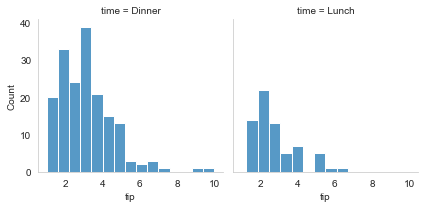

In [12]:
g = sns.FacetGrid(tips, col='time')
g.map(sns.histplot,"tip")


### Step 12. Create two scatter plots, one for male and another for female, representing the `total_bill` and `tip` relationship, differentiating by smoker or no smoker.
### They must be side by side.

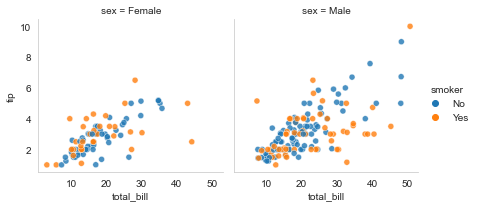

In [13]:
g = sns.FacetGrid(tips, col='sex')
g.map(sns.scatterplot,"total_bill", "tip", hue=tips.smoker,alpha=0.8)
g.add_legend(loc="right", title="smoker")


### BONUS: Create your own question and answer it using a graph.

Create a pie chart representing the proportion between male/female.

Text(0.5, 1.0, 'Sex proportion')

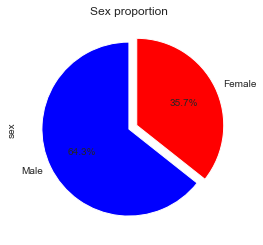

In [14]:
count=tips['sex'].value_counts()
explode = (0, 0.1) 

plot = count.plot.pie(explode=explode,colors= ['blue', 'red'],startangle=90,
        autopct='%.1f%%')

plot.set_title('Sex proportion')